# Unsupervised Learning - Data Clustering
#### Edmar Junyor Bevilaqua

## Data Clustering Evaluation - Demo 2

* Use of the K-means algorithm with different parameters.
* Synthetic dataset.
* Comparisons of the different runs using an External Evaluation Index.

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors

from sklearn.cluster import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

from sklearn.metrics import adjusted_rand_score

%matplotlib inline

sns.set(style='darkgrid', context='talk', rc={'figure.figsize': (14, 8)})

# External Index:
---

## Creating Synthetic Dataset

In [2]:
X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])
df['label'] = y

df.head()

x         y  label
0   7.415416 -5.293543      2
1  -3.898435 -0.410129      0
2  -6.065070 -0.514075      0
3  -7.980452  8.115292      3
4  10.479860 -0.900095      5

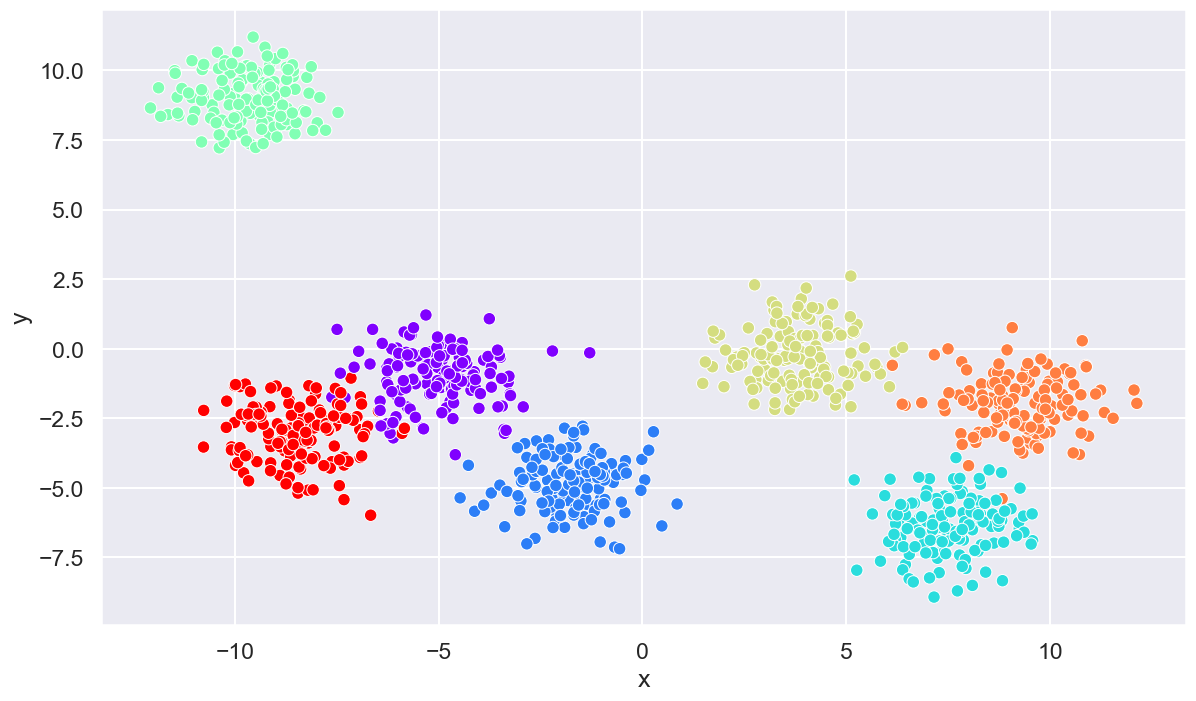

In [3]:
_ = sns.scatterplot(x='x', y='y', data=df, hue='label', palette='rainbow', legend=False)

### External Index Example:

In [6]:
import warnings

def train_and_plot(data, k=3, init='k-means++', n_init=10, max_iter=300,
                   algorithm='auto', verbose=0, random_state=133):
    warnings.filterwarnings("ignore")
    
    # Copy the data and remove the label column
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)
    
    model = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter,
                   algorithm=algorithm, random_state=random_state, verbose=verbose)
    model.fit(data_copy)
    
    data_copy['cluster_labels'] = model.labels_
    _ = sns.scatterplot(x='x', y='y', data=data_copy, hue='cluster_labels', palette='rainbow', legend=False)

    centroids = model.cluster_centers_
    centroids_x = centroids[:,0]
    centroids_y = centroids[:,1]

    _ = plt.scatter(centroids_x, centroids_y, color='black', s=100)
    
    warnings.filterwarnings("default")
    
    return model, model.labels_

### External Index Example:

#### Adjusted Rand Index

With the right number of clusters, the resulting groups are very similar to the ground truth.

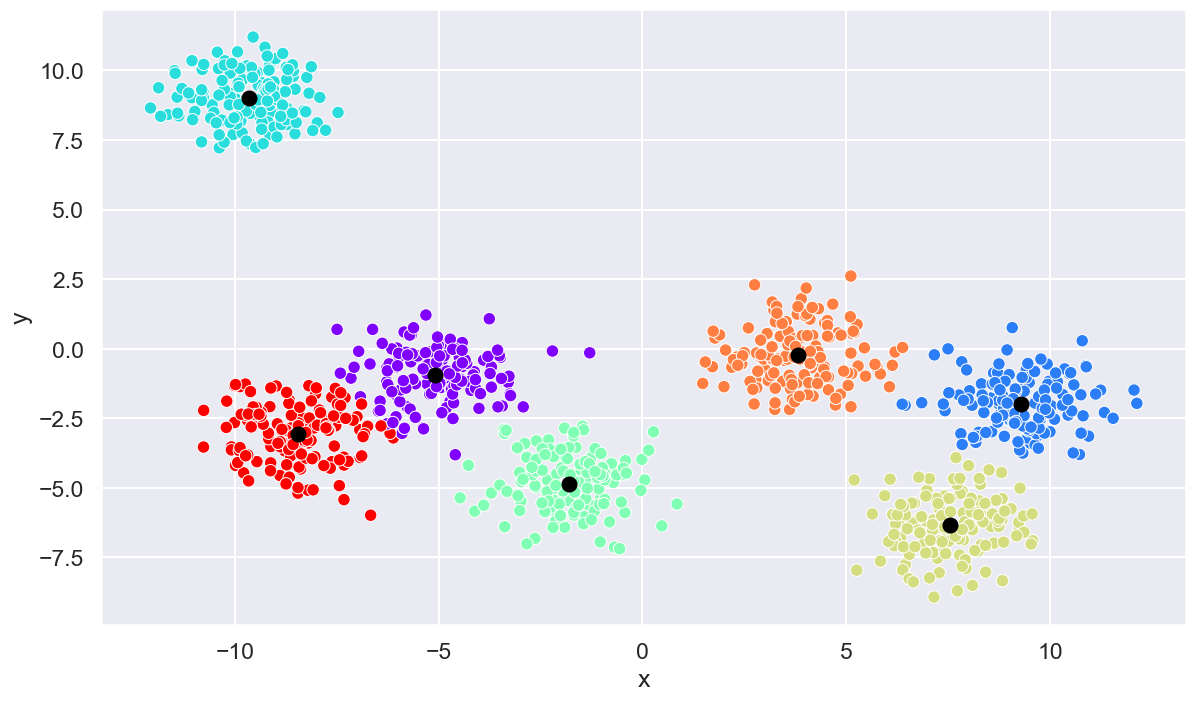

In [7]:
_, clusters_labels = train_and_plot(df, k=7)

In [8]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.9637


With random initialization, the resulting clusters are less similar to the ground truth.

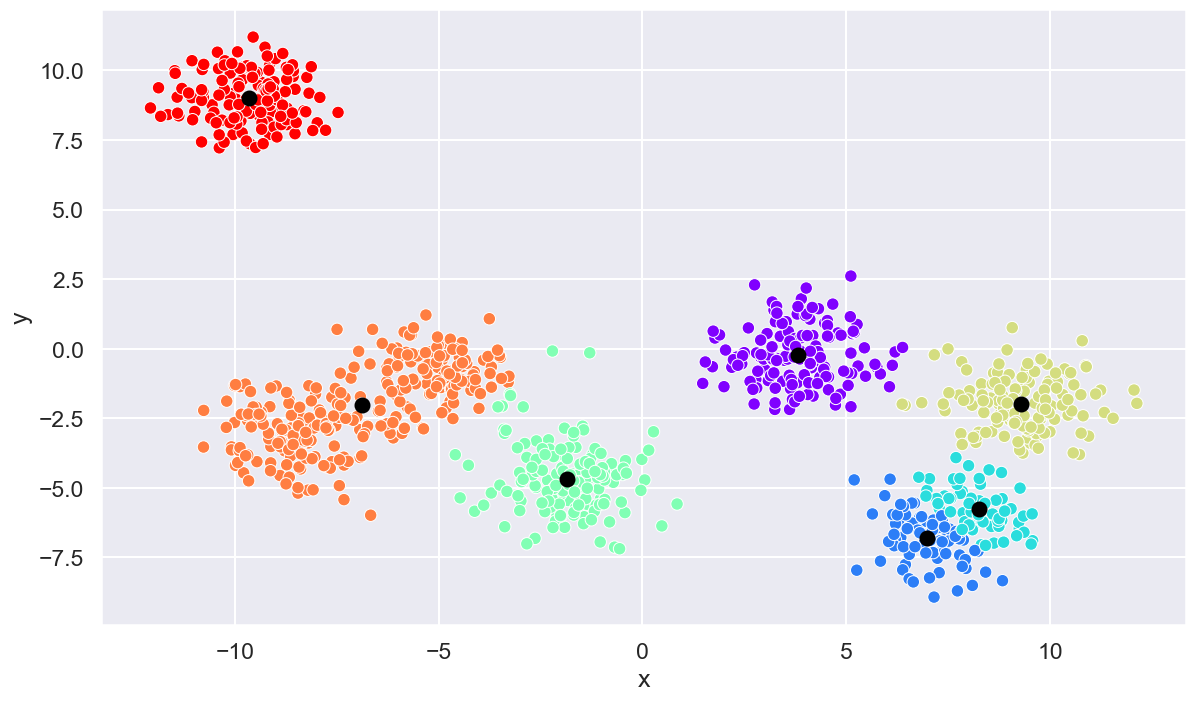

In [9]:
_, clusters_labels = train_and_plot(df, k=7, init='random', random_state=100)

In [10]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.7909


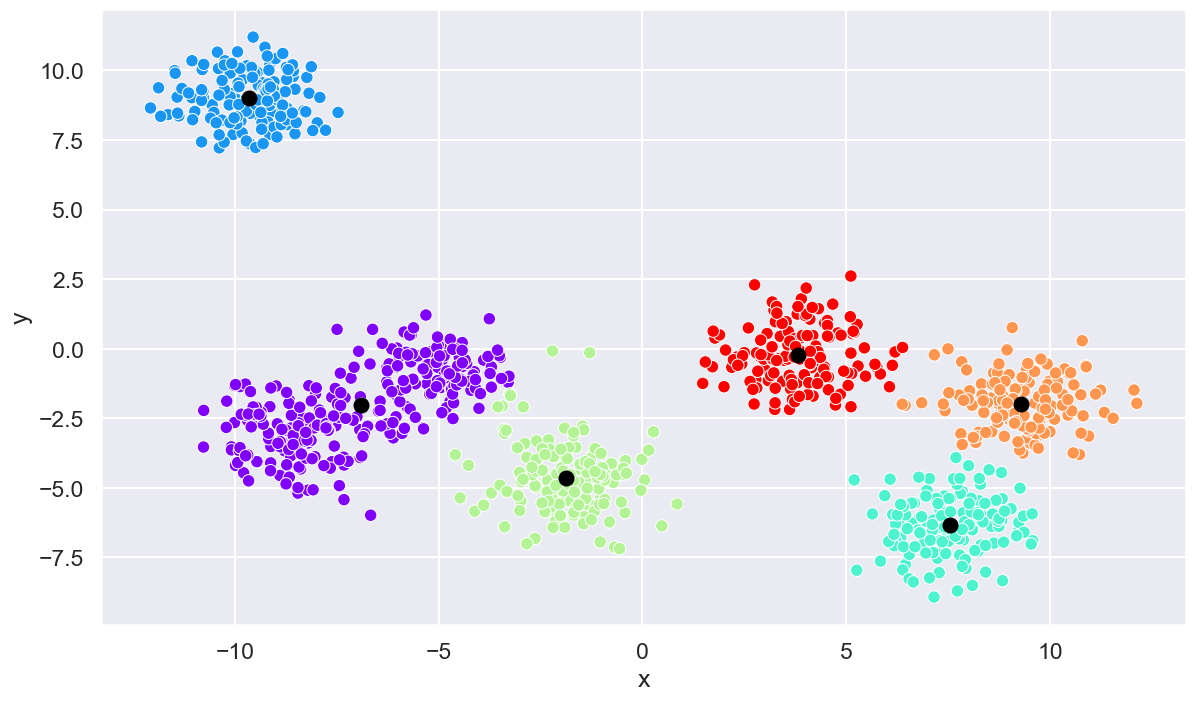

In [11]:
_, clusters_labels = train_and_plot(df, k=6, init='random', random_state=400)

In [10]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.8327


With an incorrect number of clusters, where the resulting number of groups is less than the actual number of groups.

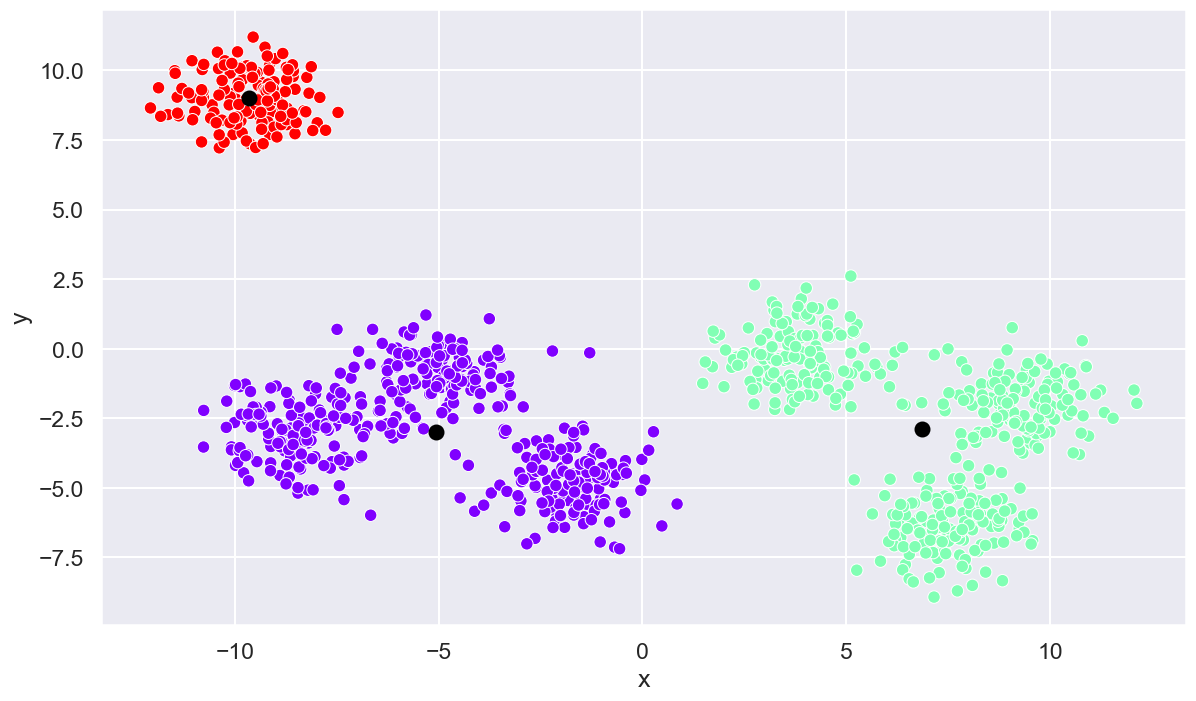

In [13]:
_, clusters_labels = train_and_plot(df, k=3)

In [14]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.4153


With an incorrect number of groups (clusters), where the resulting number of groups is greater than the actual number of groups.

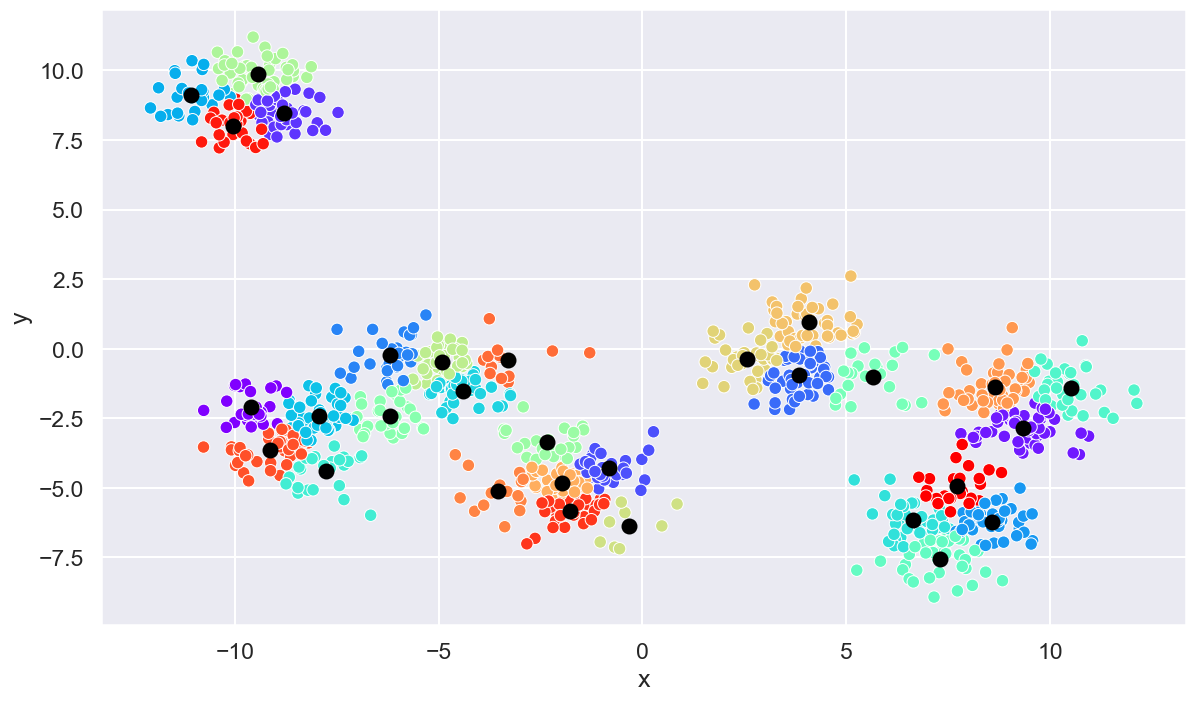

In [15]:
_, clusters_labels = train_and_plot(df, k=30)

In [16]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.3532


### Plot tests with the index:
It can be very useful to see a graph of the index varying by the number of clusters

In [22]:
import warnings

def do_ajusted_random_index_and_plot(data, max_clusters):
    
    warnings.filterwarnings("ignore")
    
    min_clusters = 1

    clusters_range = range(min_clusters, max_clusters + 1)

    aris = []
    data_copy = data.copy()
    data_copy.drop(columns='label', inplace=True)

    for k in clusters_range:
        model = KMeans(n_clusters=k, random_state=33, n_init='auto')
        model.fit(data_copy)
        
        #ARI = Ajusted Random Index
        ari = adjusted_rand_score(y, model.labels_)
        aris.append(ari)
        
    _ = plt.plot(clusters_range, aris, '-o')
    _ = plt.title('Ajusted Random Index x Número de Clusters')
    _ = plt.xlabel('Número de clusters')
    _ = plt.ylabel('Ajusted Random Index')
    _ = plt.xticks(clusters_range)
    
    warnings.filterwarnings("default")
    
    plt.show()

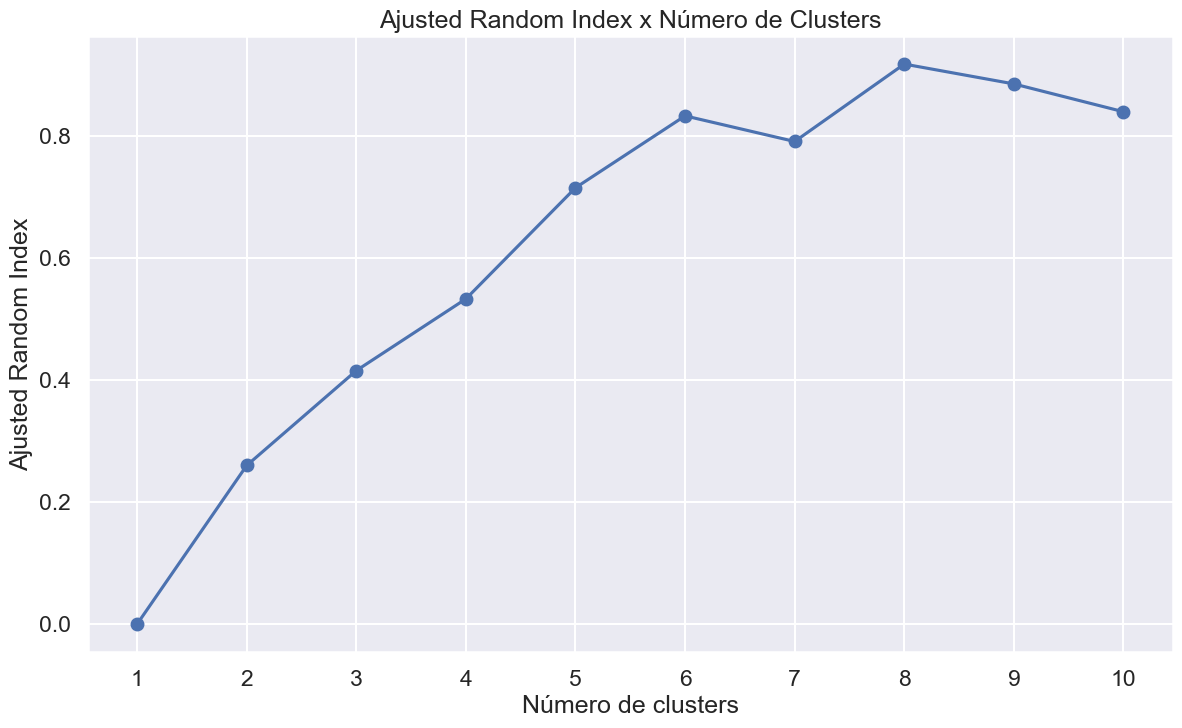

CPU times: total: 15.6 s
Wall time: 663 ms


In [23]:
%%time
do_ajusted_random_index_and_plot(df, max_clusters=10)

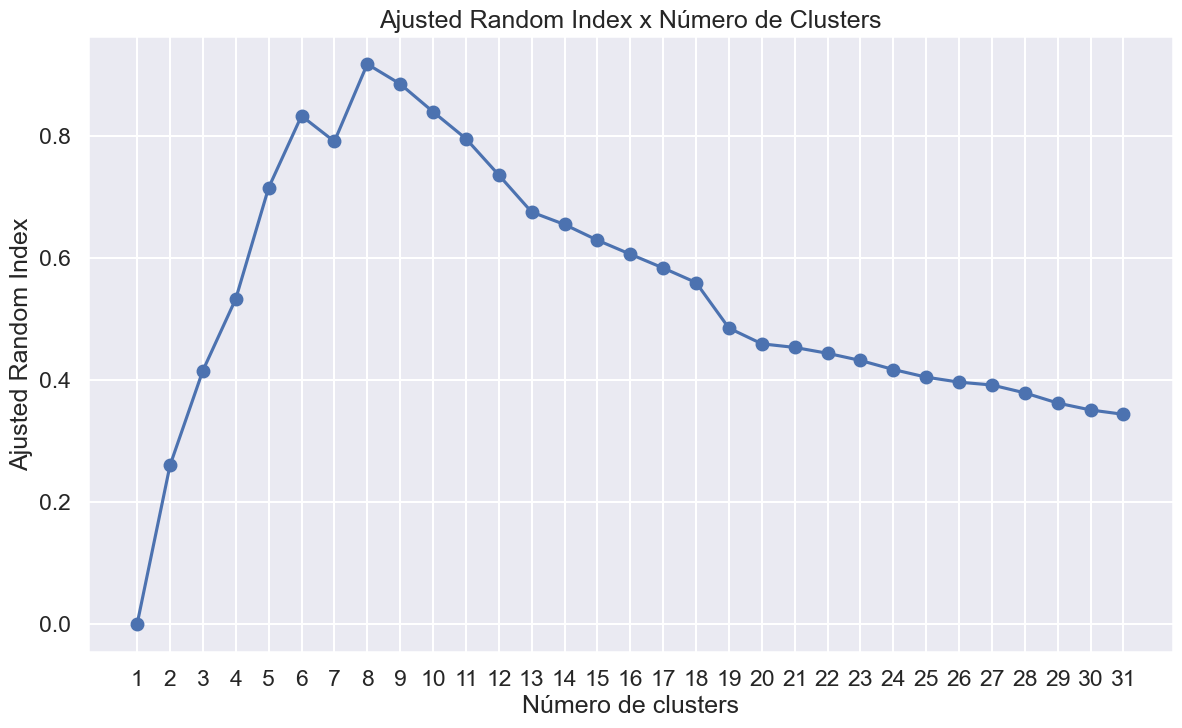

CPU times: total: 46.5 s
Wall time: 1.94 s


In [24]:
%%time
do_ajusted_random_index_and_plot(df, max_clusters=int(np.sqrt(len(df))))

## Execution with a dataset of 1M records:

In [29]:
X, y = make_blobs(n_samples=1000000, centers=7, n_features=2,
                  random_state=33)

df = pd.DataFrame(X, columns=['x', 'y'])

df.head()

x         y
0 -9.507284  7.336711
1 -5.079856 -2.823110
2 -2.155830 -5.106045
3  1.812118 -0.337578
4  8.453084 -5.795128

In [30]:
start = time.time()
model = KMeans(n_clusters=7, algorithm='lloyd', random_state=33, n_init='auto')
model.fit(df)
print(time.time() - start)

0.3508470058441162


In [31]:
print('Ajusted Random Index:', round(adjusted_rand_score(y, model.labels_), 4))

Ajusted Random Index: 0.9707


## Some limitations
Results of the evaluation of runs where K-means is limited.

In [32]:
transformation = [[0.3, -0.3], [-1.2, 0.2]]

X, y = make_blobs(n_samples=1000, centers=7, n_features=2,
                  random_state=170)

df_transformed = pd.DataFrame(np.dot(X, transformation), columns=['x', 'y'])
df_transformed['label'] = y

df_transformed.head()

x         y  label
0   3.775776 -2.551136      4
1   4.798597 -1.459384      5
2   3.910070  1.590275      0
3   5.554648  1.009466      0
4 -10.997360  2.443557      6

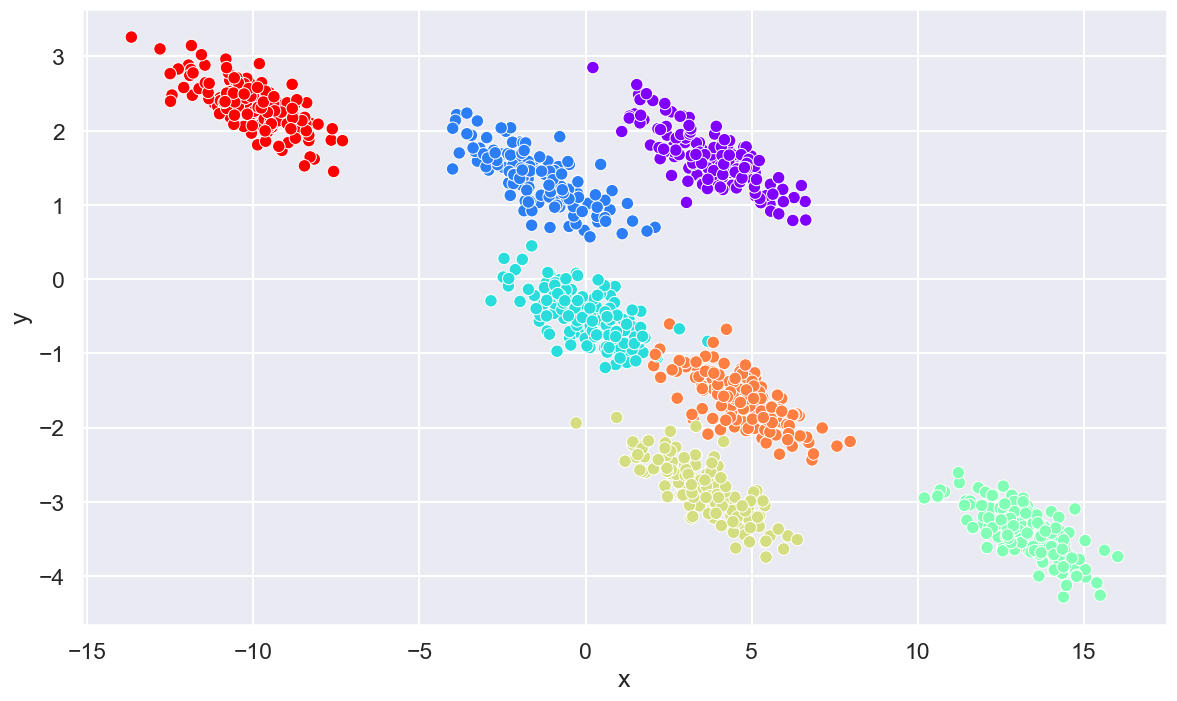

In [33]:
_ = sns.scatterplot(x='x', y='y', data=df_transformed, hue='label', palette='rainbow', legend=False)

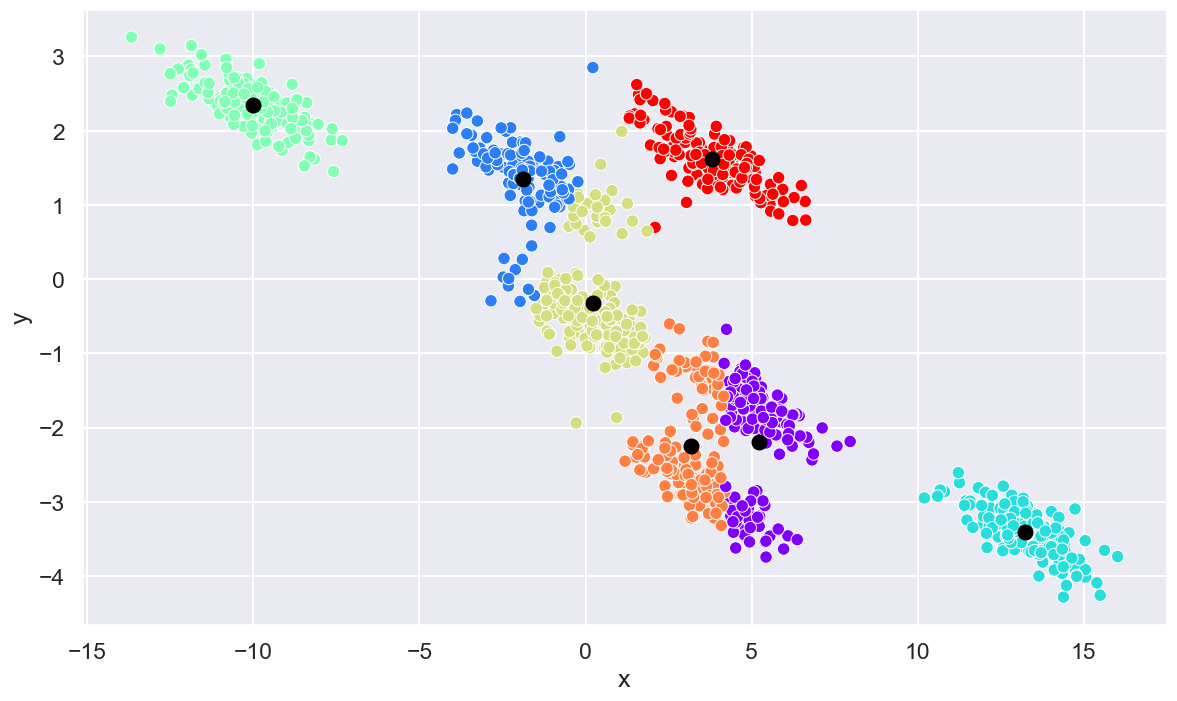

In [34]:
_, clusters_labels = train_and_plot(df_transformed, k=7)

In [35]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.7687


## Evaluating datasets with different group formats:

In [36]:
X, y = make_moons(300, noise=.05, random_state=33)

df_moon = pd.DataFrame(X, columns=['x', 'y'])
df_moon['label'] = y

df_moon.head()

x         y  label
0  0.449533 -0.403077      1
1  1.860595  0.011092      1
2  1.842407 -0.086292      1
3  1.395956 -0.438878      1
4  0.479125  0.926415      0

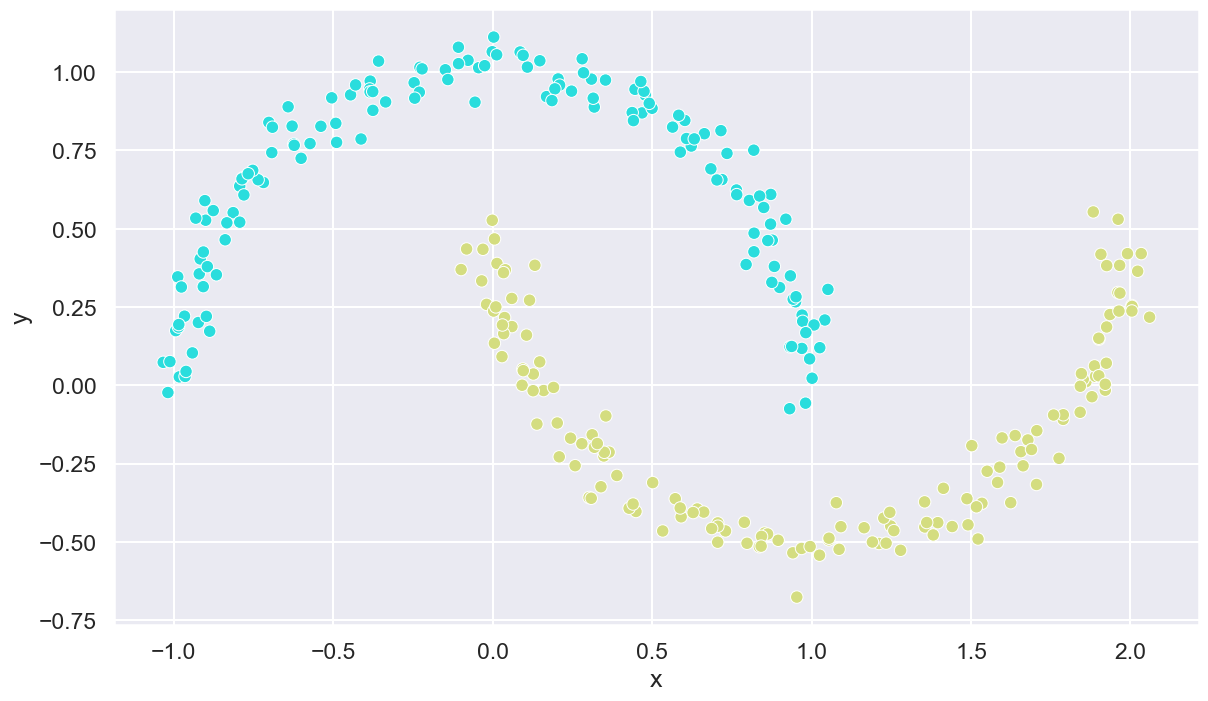

In [37]:
_ = sns.scatterplot(x='x', y='y', data=df_moon, hue='label', palette='rainbow', legend=False)

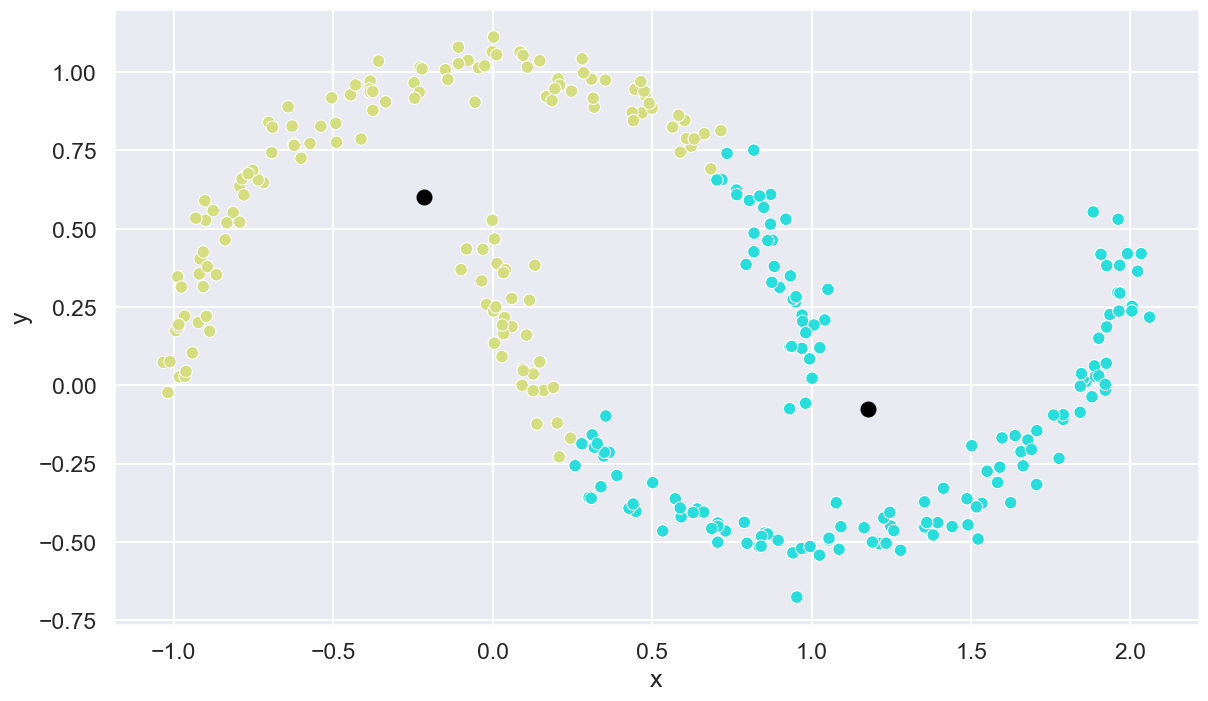

In [38]:
_, clusters_labels = train_and_plot(df_moon, k=2)

In [39]:
print('Adjusted Rand Index', round(adjusted_rand_score(y, clusters_labels), 4))

Adjusted Rand Index 0.268
